In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
join = os.path.join
from tqdm import tqdm
from skimage import transform
import sys
import argparse
import random
from datetime import datetime
import shutil
import glob
import pandas as pd
import nibabel as nib
import pickle
import time
from PIL import Image

In [22]:
def symmetric_pad_array(input_array: np.ndarray, target_shape: tuple, pad_value: int) -> np.ndarray:

    for dim_in, dim_target in zip(input_array.shape, target_shape):
        if dim_target < dim_in:
            raise Exception("`target_shape` should be greater or equal than `input_array` shape for each axis.")

    pad_width = []
    for dim_in, dim_target  in zip(input_array.shape, target_shape):
        if (dim_in-dim_target)%2 == 0:
            pad_width.append((int(abs((dim_in-dim_target)/2)), int(abs((dim_in-dim_target)/2))))
        else:
            pad_width.append((int(abs((dim_in-dim_target)/2)), (int(abs((dim_in-dim_target)/2))+1)))
    
    return np.pad(input_array, pad_width, 'constant', constant_values=pad_value)

In [24]:
raw_path = '/gpfs/data/luilab/karthik/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii.gz'
raw_nifti = nib.load(raw_path)
dat = raw_nifti.get_fdata() # (240, 240, 155)
dat = symmetric_pad_array(dat, (256,256,256), 0)

# now back to NIFTI
raw_nifti = nib.Nifti1Image(dat.astype(float), affine=raw_nifti.affine)
#nib.save(raw_nifti, f'/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/brats_segmentations_9-17-24/001/reformatted.nii')

In [26]:
raw_nifti.affine

array([[ -1.,  -0.,  -0.,   0.],
       [ -0.,  -1.,  -0., 239.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   1.]])

In [54]:
raw_path = '/gpfs/data/luilab/karthik/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii.gz'
raw_nifti = nib.load('/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/brats_segmentations_9-17-24/001/reformatted.nii')

model = 'medsam'
seg_path = f'/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/brats_segmentations_9-17-24/{model}/singletask_seg_all.npy'
seg = np.load(seg_path)
seg = np.transpose(seg, (1,2,0))
seg = np.flip(seg, axis=2)
seg = np.flip(seg, axis=1)

nifti_img = nib.Nifti1Image(seg.astype(float), affine=raw_nifti.affine)
nib.save(nifti_img, f'/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/brats_segmentations_9-17-24/{model}/seg.nii')

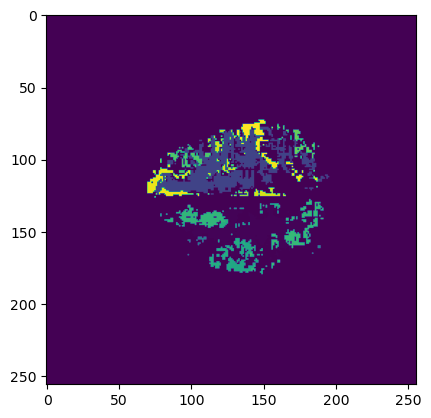

In [68]:
plt.imshow(seg[:,:,160])


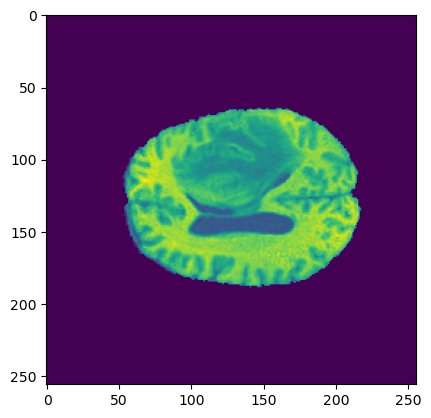

In [59]:
plt.imshow(raw_nifti.get_fdata()[:,:,140])
#plt.imshow(raw_nifti.get_fdata()[:,150,:])


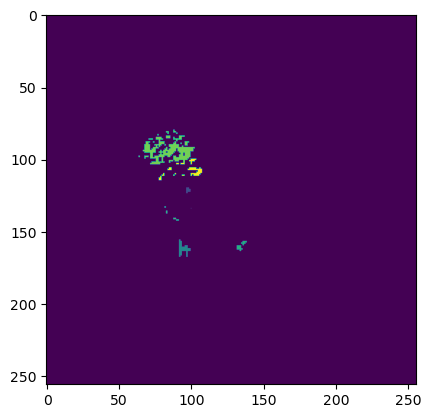

In [47]:
plt.imshow(seg[:,:,:])

In [17]:
xx = nib.load('/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/brats_segmentations_9-17-24/medsam/seg.nii').get_fdata()

0.0